In [39]:
import pandas as pd
data = pd.read_csv('./data/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [41]:
tmp = pd.get_dummies(data['ocean_proximity'], prefix = 'ocean')
data = data.drop(['ocean_proximity'],axis=1)
data = pd.concat([data,tmp],axis=1)

In [42]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [43]:
data.describe().style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


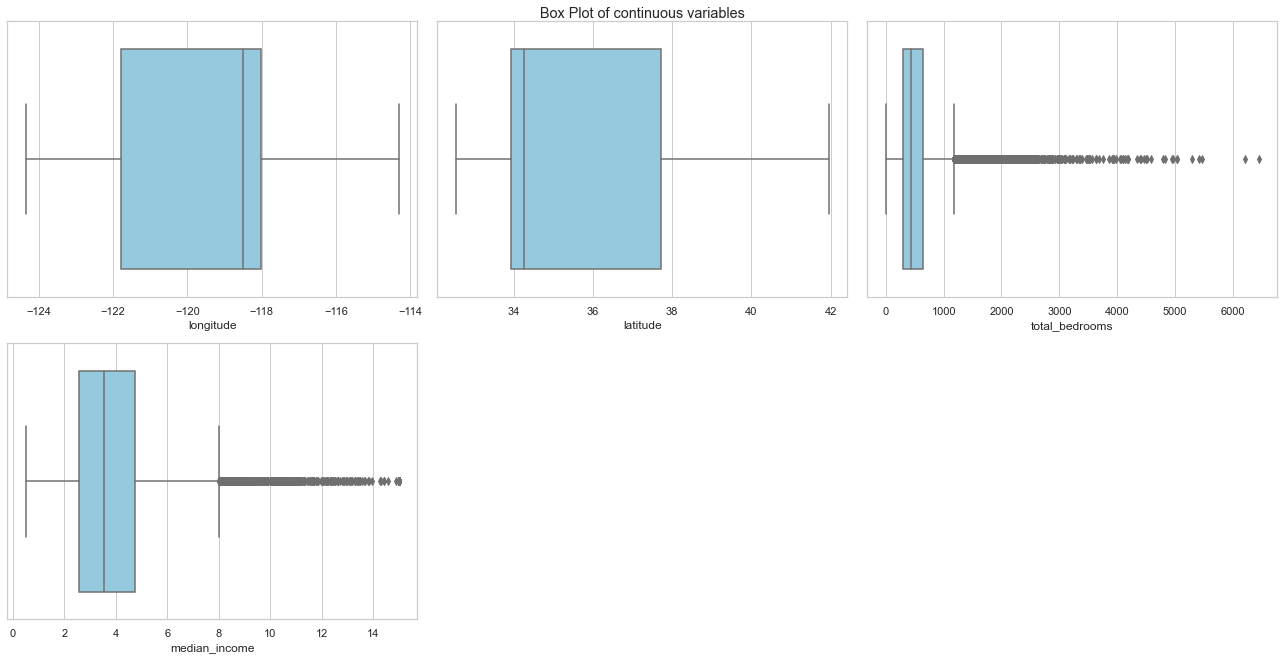

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
data1 = data.drop(['median_house_value'],axis=1)
plt.figure(figsize=(18, 18))
for i, col in enumerate(data1.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=data1, x=col, ax=ax,color='skyblue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

## 이상치 제거

In [45]:
q3 = data1.quantile(0.75) 
q1 = data1.quantile(0.25)
iqr = q3 - q1
iqr

longitude                3.79000
latitude                 3.78000
housing_median_age      19.00000
total_rooms           1700.25000
total_bedrooms         351.00000
population             938.00000
households             325.00000
median_income            2.17985
ocean_<1H OCEAN          1.00000
ocean_INLAND             1.00000
ocean_ISLAND             0.00000
ocean_NEAR BAY           0.00000
ocean_NEAR OCEAN         0.00000
dtype: float64

In [46]:
def dr_outlier(df):
    quartile_1 = df.quantile(0.25)
    quartile_3 = df.quantile(0.75)
    IQR = quartile_3 - quartile_1
    condition = (df < (quartile_1 - 1.5 * IQR)) | (df > (quartile_3 + 1.5 * IQR))
    condition = condition.any(axis=1)
    search_df = df[condition]
 
    return search_df, df.drop(search_df.index, axis=0)
new_data, _ = dr_outlier(data)
new_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20544,-121.76,38.55,23,8800,1857.0,6330,1832,2.0650,219400,0,1,0,0,0
20563,-121.75,38.67,9,12139,2640.0,6837,2358,3.1250,132500,0,1,0,0,0
20567,-121.79,38.66,15,6809,1052.0,3060,1060,5.3064,165000,0,1,0,0,0
20604,-121.54,39.12,17,4251,899.0,3265,934,2.3496,65000,0,1,0,0,0


## 결측치 제거

In [47]:
new_data = new_data.dropna(axis=0)
new_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20544,-121.76,38.55,23,8800,1857.0,6330,1832,2.0650,219400,0,1,0,0,0
20563,-121.75,38.67,9,12139,2640.0,6837,2358,3.1250,132500,0,1,0,0,0
20567,-121.79,38.66,15,6809,1052.0,3060,1060,5.3064,165000,0,1,0,0,0
20604,-121.54,39.12,17,4251,899.0,3265,934,2.3496,65000,0,1,0,0,0


## Columns 순서 재배치

In [48]:
col1 = new_data.columns[-5:].to_list()
col2 = new_data.columns[:-5].to_list()
new_col = col1 + col2
new_data = new_data[new_col]
new_data

,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,0,0,1,0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,0,0,0,1,0,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,0,0,0,1,0,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,0,0,0,1,0,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,0,0,0,1,0,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20544,0,1,0,0,0,-121.76,38.55,23,8800,1857.0,6330,1832,2.0650,219400
20563,0,1,0,0,0,-121.75,38.67,9,12139,2640.0,6837,2358,3.1250,132500
20567,0,1,0,0,0,-121.79,38.66,15,6809,1052.0,3060,1060,5.3064,165000
20604,0,1,0,0,0,-121.54,39.12,17,4251,899.0,3265,934,2.3496,65000


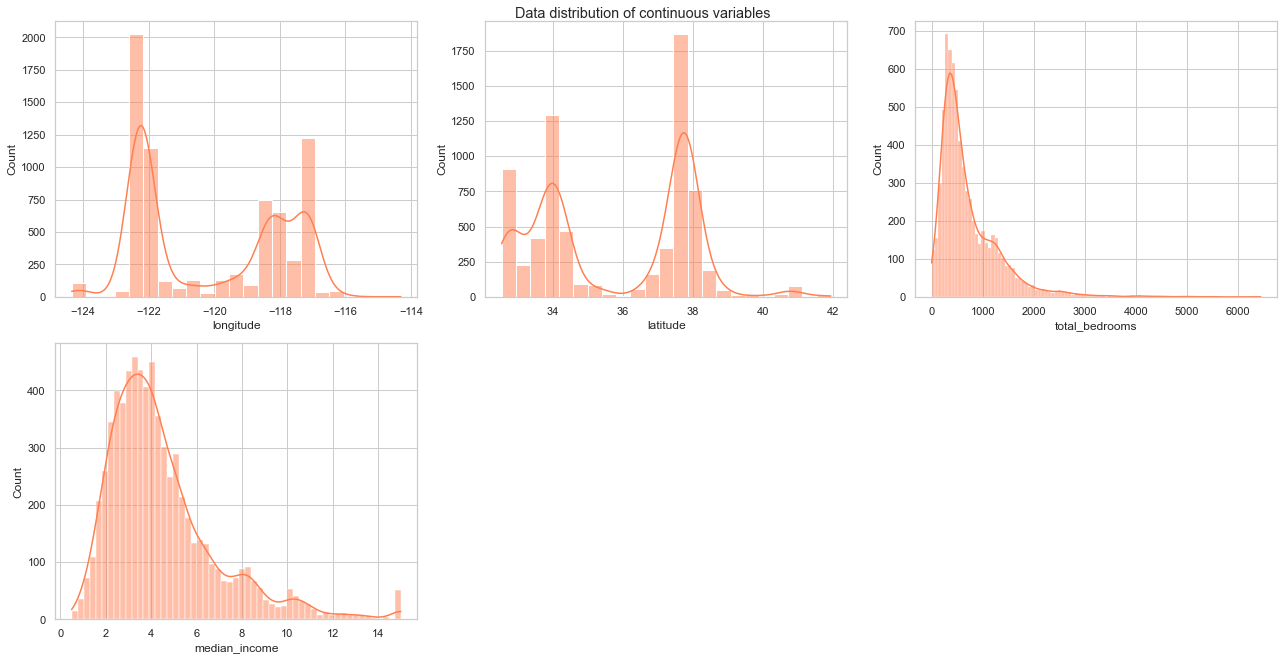

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 18))
for i, col in enumerate(new_data.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=new_data, x=col, ax=ax,color='coral',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

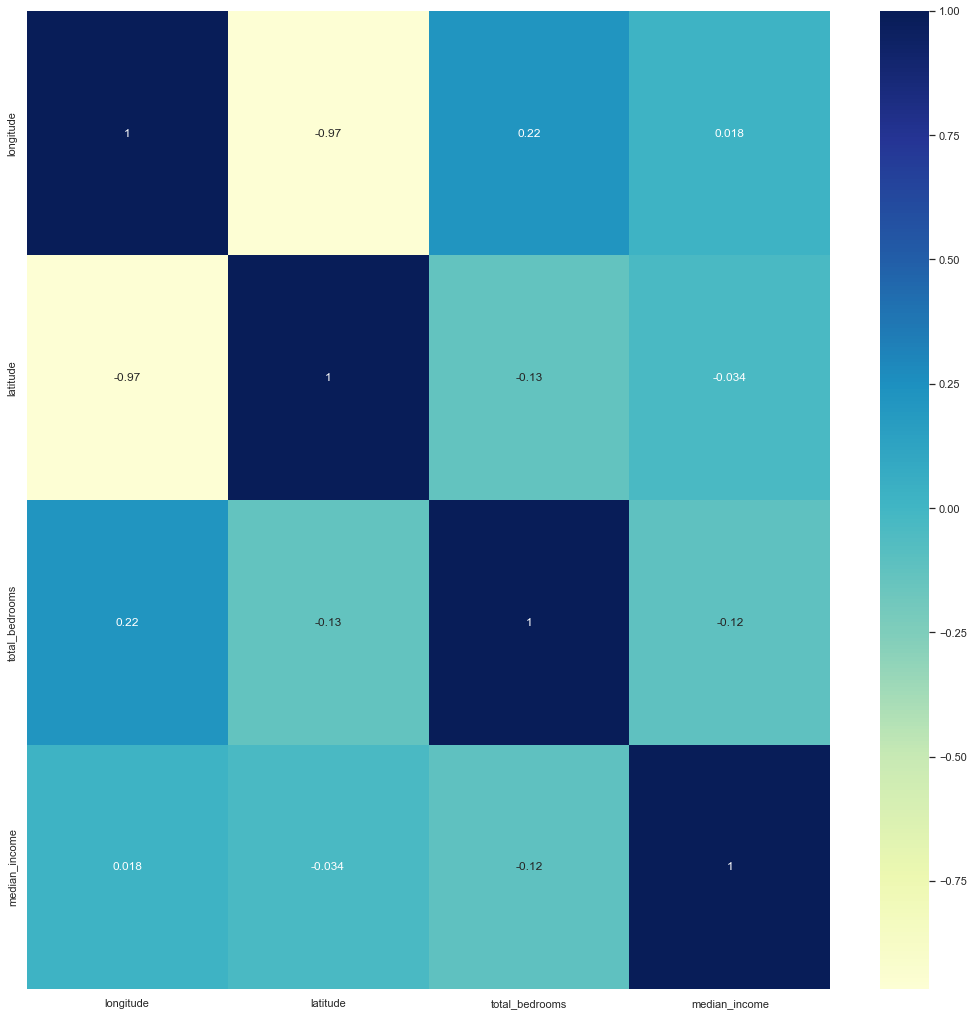

In [50]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data.select_dtypes(include=['float']).corr(),annot=True,center = 0,cmap="YlGnBu")
plt.show()

In [51]:
new_data.to_csv('./data/data_housing.csv',index=False)